# Propagacion de la afinidad

In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

C:\Users\USUARIO\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
centers = [[1,1],[-1,-1],[1,-1]]
X, labels = make_blobs(n_samples=300,centers=centers, cluster_std=0.5,random_state =0)


In [34]:
import matplotlib.pyplot as plt
from itertools import cycle

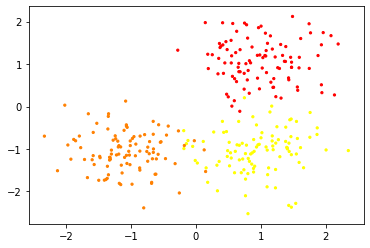

In [35]:
plt.scatter(X[:,0], X[:,1], c=labels, s=5, cmap="autumn")

In [37]:
af= AffinityPropagation(preference=-50).fit(X)

In [38]:
cluster_center_ids = af.cluster_centers_indices_

In [39]:
labels= af.labels_

In [40]:
n_clust = len(cluster_center_ids)
n_clust

3

In [62]:
def report_affinity_propagation(X):
    af= AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels =af.labels_
        
    print("numero estimado de cluster: %d"%n_clust)
    print ("homogeneidad: %0.3f"%metrics.homogeneity_score(labels,  clust_labels))
    print ("completitud: %0.3f"%metrics.homogeneity_score(labels,  clust_labels))
    print ("V-measure:%0.3f"%metrics.v_measure_score(labels,  clust_labels))
    print ("R2 JUATdo:%0.3f"%metrics.adjusted_rand_score(labels,  clust_labels))
    print ("informacion mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels,  clust_labels))
    print ("coeficiente de la silueta:%0.3f"%metrics.silhouette_score(X,labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    colors =cycle('bgrcmykbgrcmybgrcmykbgrcmy')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels ==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members,1],col +'.')
        plt.plot(clust_center[0],clust_center[1],'o', markerfacecolor=col, markeredgecolor="k", markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1],x[1]],col)
            
    plt.title("numero estumado del cluster %d"%n_clust)
    plt.show()
                                                         
                                

numero estimado de cluster: 3
homogeneidad: 1.000
completitud: 1.000
V-measure:1.000
R2 JUATdo:1.000
informacion mutua ajustada: 1.000
coeficiente de la silueta:0.753


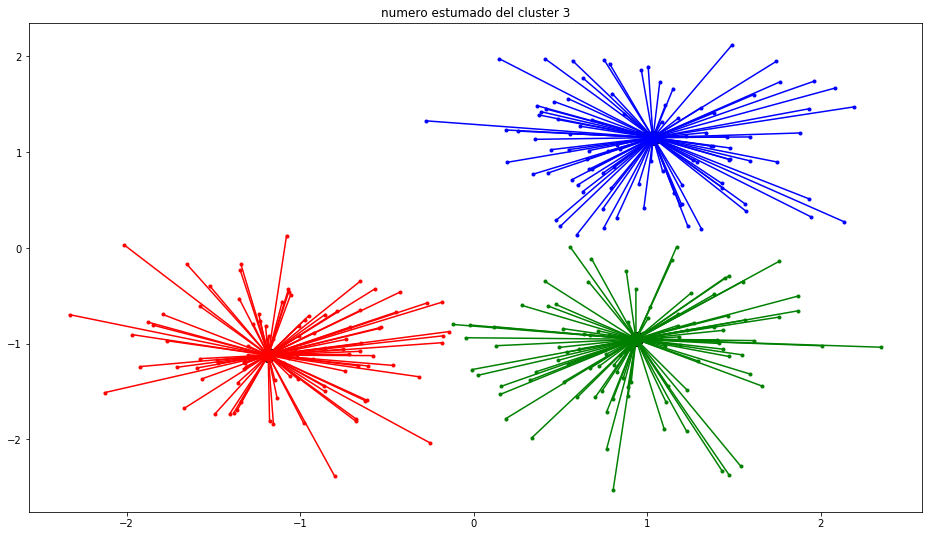

In [63]:
report_affinity_propagation(X)